In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as st

from scipy.linalg import expm, logm, sqrtm


In [6]:
"""
Pandas and Yfinance
"""

assets = ['JCI', 'TGT', 'CMCSA', 'CPB',
          'MO', 'APA', 'AAPL', 'MSFT', 'NVDA']
assets.sort()

start = '2019-12-30'
end = '2022-12-31'

prices = yf.download(assets, start=start, end=end)
# Here we select all rows and columns that has 'Adj Close' in first level of columns
prices = prices.loc[:, ('Adj Close', slice(None))]
# Here we replace the names of the columns
prices.columns = assets

C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[****************      33%%                      ]  3 of 9 completedC:\Users\josep\PycharmProject

In [3]:
prices

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,NVDA,TGT
Date,,,,,,,,,
2019-12-30,70.911530,23.763147,40.809372,43.151562,36.968708,35.978863,151.579361,57.853928,117.348244
2019-12-31,71.429672,23.847017,40.619686,43.300514,37.023281,35.993279,151.685226,58.596031,116.729149
2020-01-02,73.059425,23.632687,40.980980,42.485672,37.650787,35.517323,154.493805,59.744049,114.780769
2020-01-03,72.349136,23.940207,40.655807,42.433098,36.977802,35.791359,152.570114,58.787781,113.588089
2020-01-06,72.925629,23.893610,40.348701,42.503189,37.450706,35.935600,152.964493,59.034309,112.513756
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.959961,45.735184,33.911404,55.090580,62.497887,42.374432,236.195023,151.992554,137.644409
2022-12-27,129.142426,46.112671,33.776295,55.350258,62.692894,42.594364,234.443817,141.147369,139.952103
2022-12-28,125.179672,43.731541,33.409584,54.859756,61.639881,42.017029,232.039612,140.297745,140.192505


In [28]:
R = np.log(prices.shift(-1) / prices)
R = R.dropna()
R

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,NVDA,TGT
Date,,,,,,,,,
2019-12-30,0.007280,0.003523,-0.004659,0.003446,0.001475,0.000401,0.000698,0.012745,-0.005290
2019-12-31,0.022560,-0.009028,0.008855,-0.018998,0.016807,-0.013312,0.018347,0.019403,-0.016832
2020-01-02,-0.009770,0.012929,-0.007966,-0.001238,-0.018036,0.007686,-0.012530,-0.016135,-0.010445
2020-01-03,0.007937,-0.001948,-0.007583,0.001651,0.012708,0.004022,0.002581,0.004185,-0.009503
2020-01-06,-0.004714,0.237394,0.010516,0.000623,-0.010497,-0.005231,-0.009160,0.012034,0.001779
...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.002802,0.055703,0.009148,0.008063,-0.000468,0.009998,0.002264,-0.008709,0.012654
2022-12-23,-0.013976,0.008220,-0.003992,0.004703,0.003115,0.005177,-0.007442,-0.074027,0.016627
2022-12-27,-0.031166,-0.053018,-0.010917,-0.008901,-0.016939,-0.013647,-0.010308,-0.006038,0.001716


In [3]:
# Map probability to z-score using CDF which is invertible
p = 0.95
print(st.norm.ppf(p))

# Map z-score to probability
z = 1.6448536269514722
print(st.norm.cdf(z))

1.6448536269514722
0.95


In [32]:
### Fitting distributions to data

def find_best_distribution(data):
    
    dist_names = [ 'norm', 'johnsonsu', 'laplace', 't' ]
    
    dist_params = {}
    results = []
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        params = dist.fit(data)
        dist_params[dist_name] = params
        res = st.kstest(data, dist_name, params)
        results.append((dist_name, params, res.pvalue))
    
    return max(results, key = lambda x: x[1]) 

print(find_best_distribution(R['AAPL']))
print(find_best_distribution(R['NVDA']))
print(find_best_distribution(R['TGT']))

('t', (4.1644310634749555, 0.001094532163255329, 0.016909377199080713), 0.9403311595385474)
('t', (5.936699904379363, 0.0016198802624012908, 0.028760128002606425), 0.7907762435972066)
('t', (2.7472339919796402, 0.0007879531232913586, 0.013006322808994499), 0.9718413591077791)


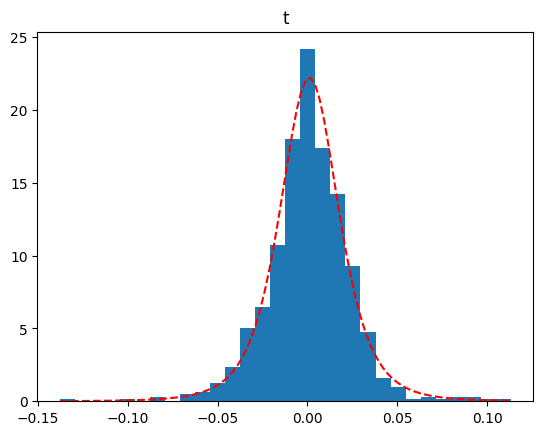

In [37]:
# Display data and fitted distribution
def plot_fitted_distribution(data, dist_name, params):
    
    dist = getattr(st, dist_name)
    x = np.linspace(data.min(), data.max(), 100)
    y = dist.pdf(x, *params)
    
    plt.hist(data, bins=30, density=True)
    plt.plot(x, y, 'r--')
    plt.title(dist_name)
    plt.show()

fitted_dist_name, params, p = find_best_distribution(R['AAPL'])
plot_fitted_distribution(R['AAPL'], fitted_dist_name, params)